<a href="https://colab.research.google.com/github/sooryaramesh13/project-2-zomato/blob/main/project_2_zomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About the Dataset:**



**url** : This feature contains the url of the restaurant on the Zomato website


**address** : This feature contains the address of the restaurant in Bangalore


**name**  : This feature contains the name of the restaurant


**online_order** : whether online ordering is available in the restaurant or not


**book_table** : table book option available or not


**rate** : contains the overall rating of the restaurant out of 5


**votes** : contains total number of upvotes for the restaurant


**phone** : contains the phone number of the restaurant


**location** : contains the neighborhood in which the restaurant is located


**rest_type** : restaurant type


**dish_liked** : dishes people liked in the restaurant


**cuisines** : food styles, separated by comma


**approx_cost(for two people)** : contains the approximate cost of meal for two people


**reviews_list** : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer


**menu_item** : contains list of menus available in the restaurant


**listed_in(type)** : type of meal


**listed_in(city)**: contains the neighborhood in which the restaurant is located

# **importing libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **reading csv**


In [ ]:
df_zomato= pd.read_csv("/content/drive/MyDrive/zomato.csv")

In [ ]:
df_zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df_zomato.shape

(51717, 17)

In [ ]:
df_zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
df_zomato=df_zomato.drop(['url' ,'address' ,'phone' ,'menu_item' ,'dish_liked' ,'reviews_list'],axis=1)

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [ ]:
df_zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

# **dropping duplicate**

In [ ]:
df_zomato.drop_duplicates(inplace = True)

In [ ]:
df_zomato.shape

(51609, 11)

# **cleaning rate column**

In [ ]:
df_zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

# **removing "New","-"and"/5 from rate column**

In [ ]:
def handlerate(value):
  if(value=='NEW'or value=="-"):
    return np.nan
  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)
df_zomato['rate']=df_zomato['rate'].apply(handlerate)
df_zomato['rate'].head()        

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
df_zomato.rate.isnull().sum()

10019

# **filling null values in rate column with mean**

In [ ]:

df_zomato['rate'].fillna(df_zomato['rate'].mean(),inplace = True)
df_zomato['rate'].isnull().sum()

0

In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [ ]:
df_zomato.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
cuisines                        45
approx_cost(for two people)    344
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

# **dropping null values**

In [ ]:

df_zomato.dropna(inplace = True)
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
rename_cols = {
    "approx_cost(for two people)":"cost",
    "listed_in(type)":"type",
    "listed_in(city)":"city"
}
df_zomato = df_zomato.rename(columns=rename_cols)
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [ ]:
df_zomato['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'RT Nagar', 'MG Road', 'Brigade Road',
       'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
       'Shivajinagar', 'Infantry Road', 'St. Marks Road',
       'Cunningham Road', 'Race Course Road', 'Commercial Street',
       'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
       'Jeeva

In [ ]:
df_zomato['city'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# **city and location,both are there,lets keep only one**

In [ ]:
df_zomato=df_zomato.drop(['city'],axis=1)

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [ ]:
df_zomato['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

# **removing"," from cost column**

In [ ]:
def handlecomma(value):
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value) 
df_zomato['cost']=df_zomato['cost'].apply(handlecomma)
df_zomato['cost'].unique()       

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [ ]:

df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# **cleaning rest type column**

In [ ]:
df_zomato['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_type=df_zomato['rest_type'].value_counts(ascending = False)
df_zomato

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,1500.0,Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.700142,0,Whitefield,Bar,Finger Food,600.0,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,Bar,Finger Food,2000.0,Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500.0,Pubs and bars


In [ ]:
rest_type_lessthan1000=rest_type[rest_type<1000]
rest_type_lessthan1000


Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

# **making rest types less than 1000 in frequency as others**

In [ ]:
def handle_rest_type(value):
  if(value in rest_type_lessthan1000):
    return 'others'
  else:
    return value
df_zomato['rest_type']=df_zomato['rest_type'].apply(handle_rest_type)
df_zomato['rest_type'].value_counts()        

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# **cleaning location column**

In [ ]:
df_zomato['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [ ]:
location = df_zomato['location'].value_counts(ascending = False)
location_lessthan300 = location[location<300]

def handle_location(value):
  if(value in location_lessthan300):
    return 'others'
  else:
    return value

df_zomato['location']=df_zomato['location'].apply(handle_location)
df_zomato['location'].value_counts()        

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


# **cleaning cuisines column**

In [ ]:

cuisines = df_zomato['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = location[location<100]

def handle_cuisines(value):
  if(value in cuisines_lessthan100):
    return 'others'
  else:
    return value

df_zomato['cuisines']=df_zomato['cuisines'].apply(handle_cuisines)
df_zomato['cuisines'].value_counts() 

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
df_zomato['type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: type, dtype: int64

In [ ]:
df_zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
cost            0
type            0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


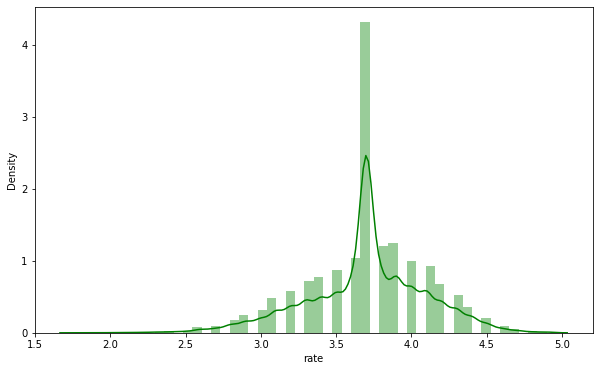

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


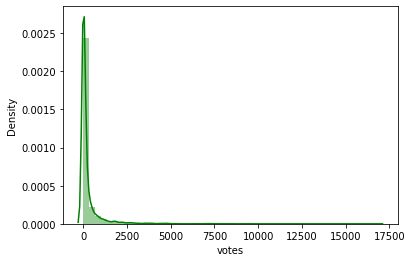

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


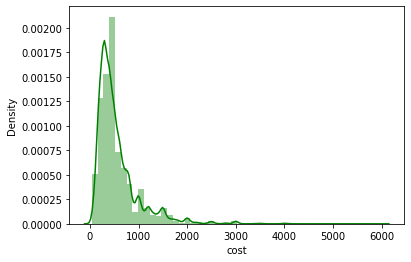

In [ ]:
#

z = df_zomato.select_dtypes(include = np.number)
z




plt.figure(figsize = (10, 6))

for i in z.columns:
    sns.distplot(df_zomato[i], color = 'green')
    plt.show()

# **Visualization**

**count plot of various location**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

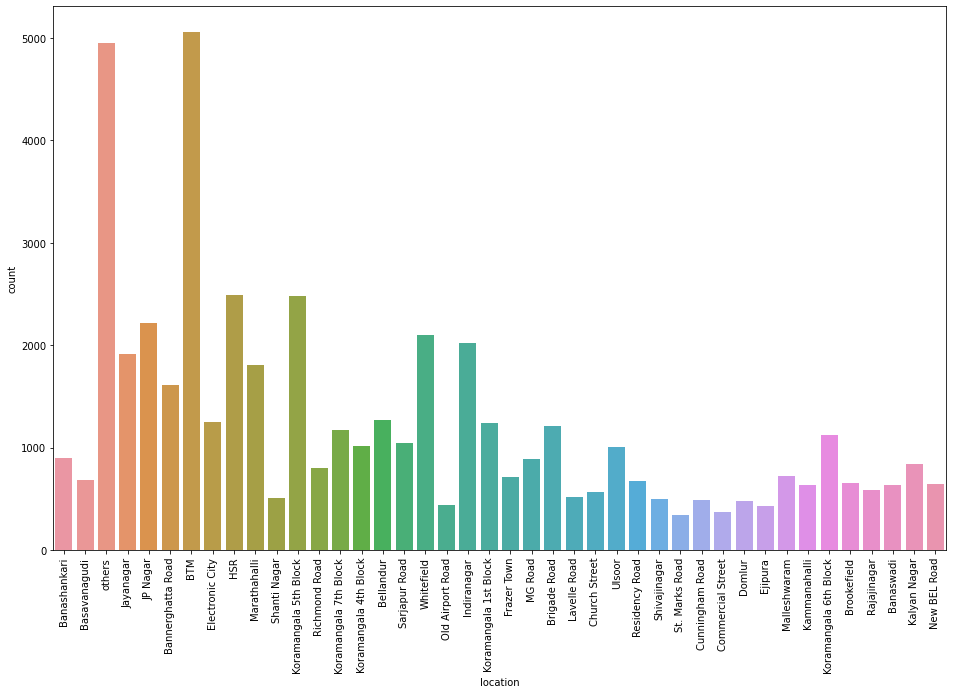

In [ ]:
plt.figure(figsize=(16,10))
ax=sns.countplot(df_zomato['location'])
plt.xticks(rotation=90)

**visualizing online order**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='online_order', ylabel='count'>

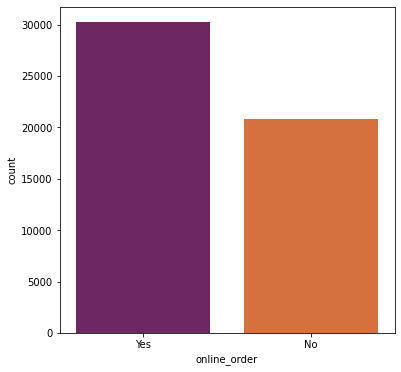

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df_zomato['online_order'],palette ='inferno')

**visualizing book table**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='book_table', ylabel='count'>

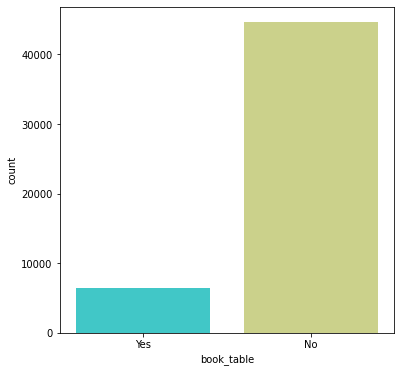

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df_zomato['book_table'],palette ='rainbow')

**visualizing online order vs rate**

<AxesSubplot:xlabel='online_order', ylabel='rate'>

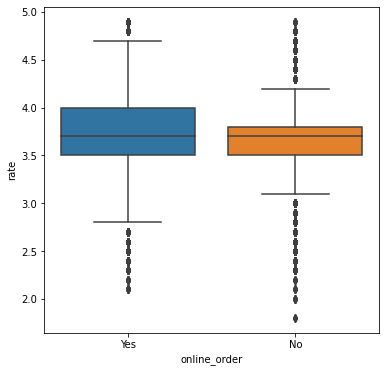

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=df_zomato)

**visualizing book table vs rate**

<AxesSubplot:xlabel='book_table', ylabel='rate'>

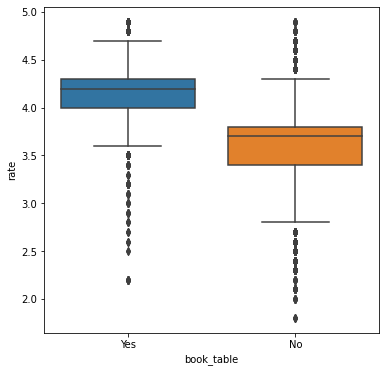

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=df_zomato)

**visualizing online order facility, location wise**

In [ ]:
df1=df_zomato.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<AxesSubplot:xlabel='location'>

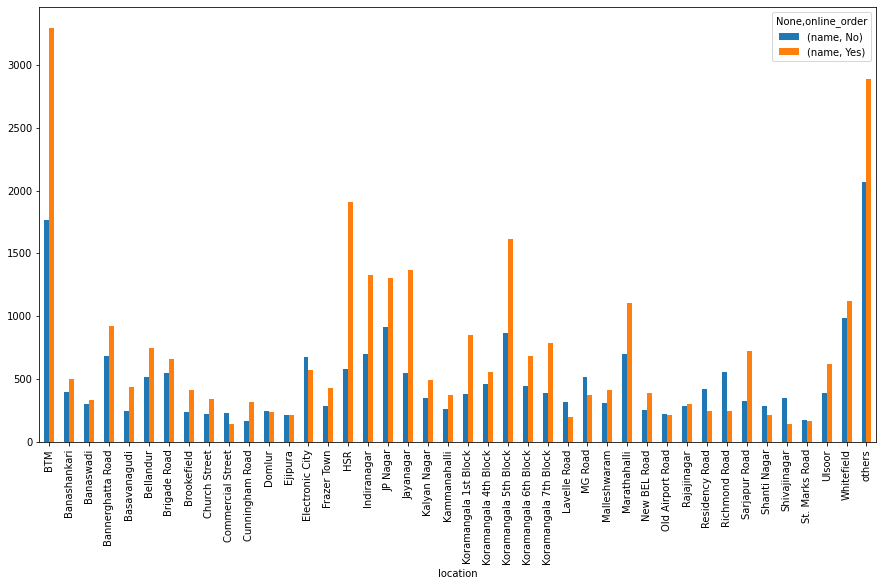

In [ ]:
df1.plot(kind ='bar' ,figsize =(15,8))

**visualizing book table facility,location wise**

In [ ]:
df2=df_zomato.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    4889  167
Banashankari            839   63
Banaswadi               632    8
Bannerghatta Road      1510   99
Basavanagudi            668   16
Bellandur              1170   98
Brigade Road           1034  176
Brookefield             582   74
Church Street           385  181
Commercial Street       370    0
Cunningham Road         315  175
Domlur                  427   55
Ejipura                 433    0
Electronic City        1148   98
Frazer Town             706    8
HSR                    2277  217
Indiranagar            1578  448
JP Nagar               1903  315
Jayanagar              1637  279
Kalyan Nagar            692  149
Kammanahalli            590   49
Koramangala 1st Block  1186   50
Koramangala 4th Block   695  322
Koramangala 5th Block  1787  692
Koramangala 6th Block  1015  112
Koramangala 7th Block  1012  162
Lavelle Road            290  228
MG Road                 546  347
Malleshwaram            632   89
Marathahalli           1642  163
New BEL Road            588   56
Old Airport Road        378   59
Rajajinagar             550   41
Residency Road          522  149
Richmond Road           687  116
Sarjapur Road           893  154
Shanti Nagar            451   57
Shivajinagar            475   23
St. Marks Road          219  124
Ulsoor                  834  177
Whitefield             1852  253
others                 4587  367

<AxesSubplot:xlabel='location'>

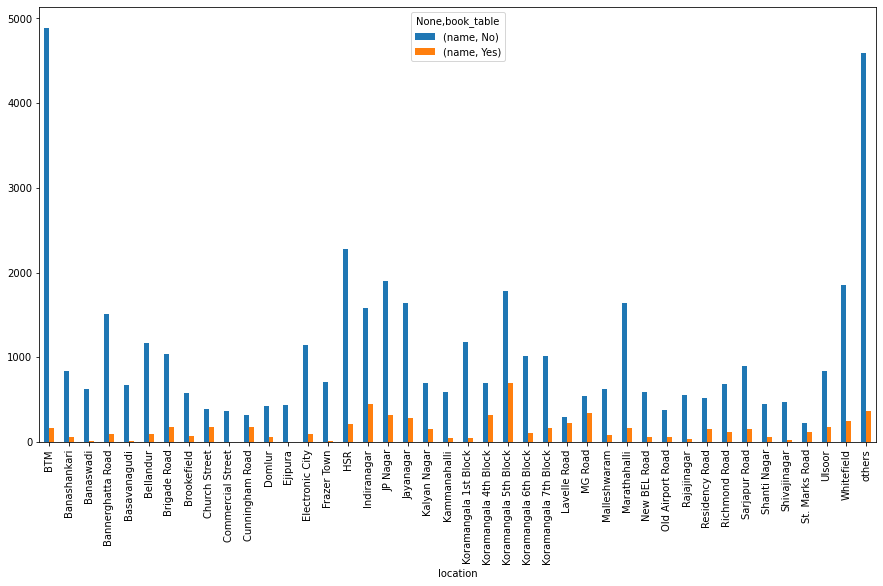

In [ ]:
df2.plot(kind ='bar' ,figsize =(15,8))

**visualizing types of restaurents vs rate**

<AxesSubplot:xlabel='type', ylabel='rate'>

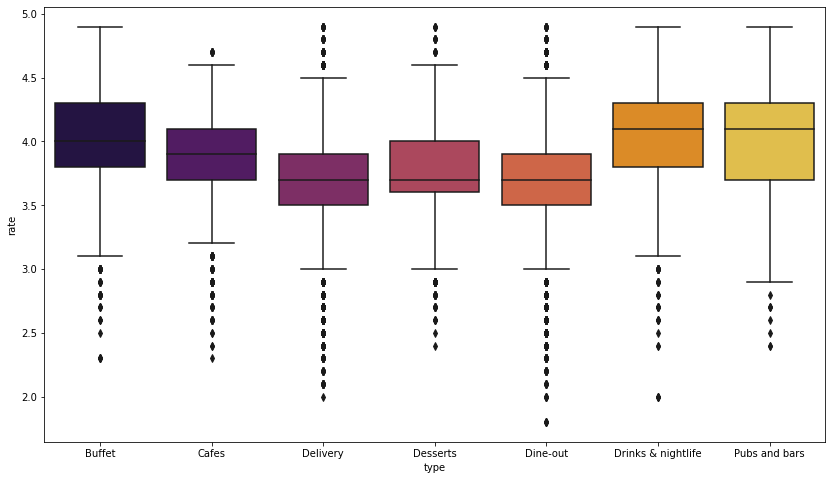

In [ ]:
plt.figure(figsize=(14,8))
sns.boxplot(x ='type',y ='rate',data=df_zomato,palette='inferno')


**grouping types of restaurents,location wise**

In [ ]:
df3=df_zomato.groupby(['location','type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['type'],fill_value=0,aggfunc=np.sum)
df3

name                                   \
type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       21    83     3053      198     1660   
Banashankari               7    36      418       71      356   
Banaswadi                  0    24      310       37      262   
Bannerghatta Road          9    46      828      137      578   
Basavanagudi               7    11      344       66      251   
Bellandur                 28    36      617       75      479   
Brigade Road              25    46      497      108      455   
Brookefield                6    17      339       45      245   
Church Street             19    51      193       29      215   
Commercial Street          0    13      121       77      159   
Cunningham Road           29    34      194       26      184   
Domlur                    15    13      261       35      135   
Ejipura                    0     0      245       16      172   
Electronic City           23    24      570       71      516   
Frazer Town                1    11      470       56      172   
HSR                       19    49     1694      120      580   
Indiranagar               38    97     1091      140      529   
JP Nagar                  45    76     1151      166      722   
Jayanagar                 27    77     1043      182      575   
Kalyan Nagar               9    45      366       88      315   
Kammanahalli               2    27      329       35      240   
Koramangala 1st Block      3    26      716       70      398   
Koramangala 4th Block     21    53      464       81      302   
Koramangala 5th Block     65   146     1075      209      842   
Koramangala 6th Block     18    43      511       70      411   
Koramangala 7th Block     25    52      503      127      417   
Lavelle Road              30    27      127       50      191   
MG Road                   51    76      266       68      343   
Malleshwaram              11    31      269       85      291   
Marathahalli              34    32      980      105      630   
New BEL Road               4    29      338       33      224   
Old Airport Road          12     5      200       35      164   
Rajajinagar               10     4      258       55      251   
Residency Road            20    31      187       63      289   
Richmond Road             63    21      257       78      356   
Sarjapur Road             25    22      558       82      319   
Shanti Nagar               9    22      198       39      229   
Shivajinagar               6    17      143       37      280   
St. Marks Road             5    10      111       10      145   
Ulsoor                    16    56      456       71      359   
Whitefield                28    51     1041      137      768   
others                    83   133     2787      276     1553   

                                                        
type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   22            19  
Banashankari                          14             0  
Banaswadi                              6             1  
Bannerghatta Road                      9             2  
Basavanagudi                           5             0  
Bellandur                             17            16  
Brigade Road                          57            22  
Brookefield                            4             0  
Church Street                         36            23  
Commercial Street                      0             0  
Cunningham Road                       16             7  
Domlur                                12            11  
Ejipura                                0             0  
Electronic City                       21            21  
Frazer Town                            2             2  
HSR                                   14            18  
Indiranagar    

<AxesSubplot:xlabel='location'>

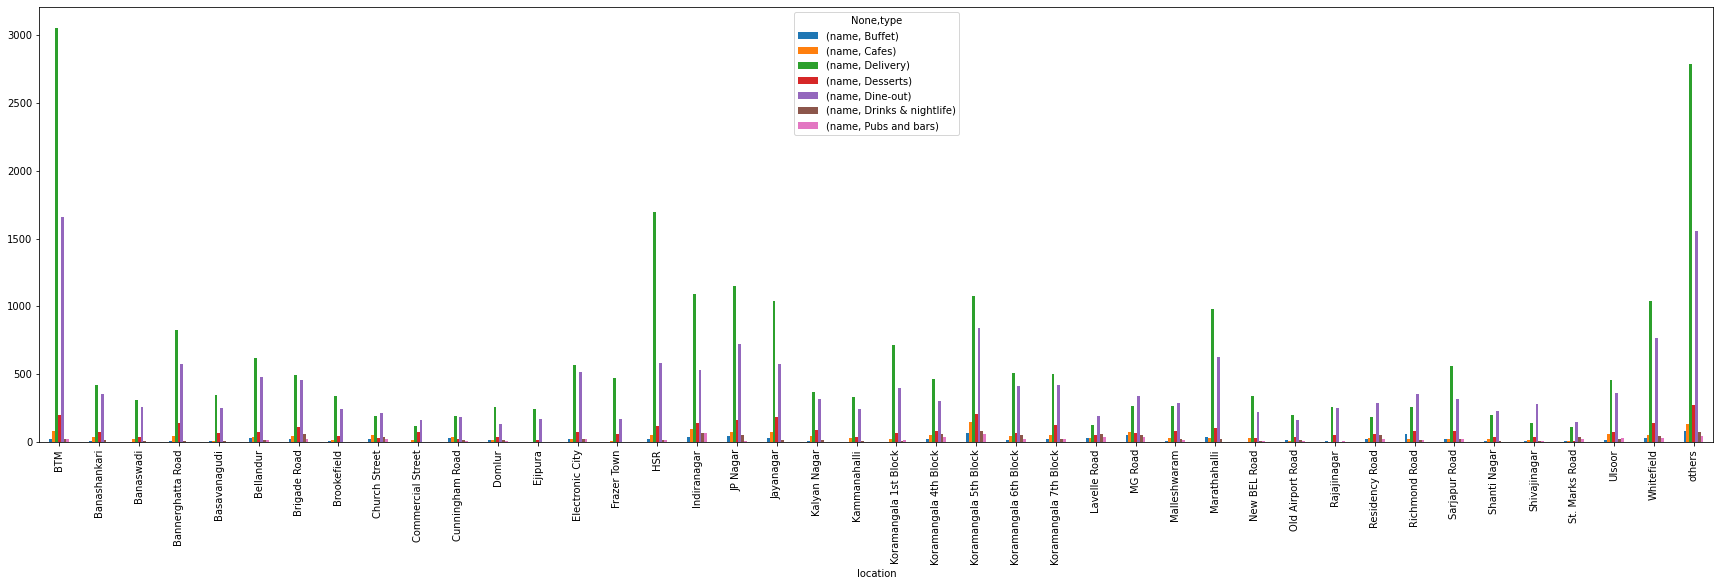

In [ ]:
df3.plot(kind ='bar' ,figsize =(30,8))

**No.of votes,location wise**

In [ ]:
df4=df_zomato[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
Koramangala 5th Block,2214083
Indiranagar,1165909
Koramangala 4th Block,685156
Church Street,590306
JP Nagar,586522


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'Koramangala 4th Block'),
  Text(3, 0, 'Church Street'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'BTM'),
  Text(6, 0, 'others'),
  Text(7, 0, 'HSR'),
  Text(8, 0, 'Lavelle Road'),
  Text(9, 0, 'Koramangala 7th Block'),
  Text(10, 0, 'Jayanagar'),
  Text(11, 0, 'Whitefield'),
  Text(12, 0, 'Koramangala 6th Block'),
  Text(13, 0, 'Marathahalli'),
  Text(14, 0, 'MG Road'),
  Text(15, 0, 'Brigade Road'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Residency Road'),
  Text(18, 0, 'Cunningham Road'),
  Text(19, 0, 'St. Marks Road'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Malleshwaram'),
  Text(22, 0, 'Bannerghatta Road'),
  Text(23, 0, 'Bellandur'),
  Text(24, 0, 'Ulsoor'),
  Text(25, 0, 'New BEL Road'),

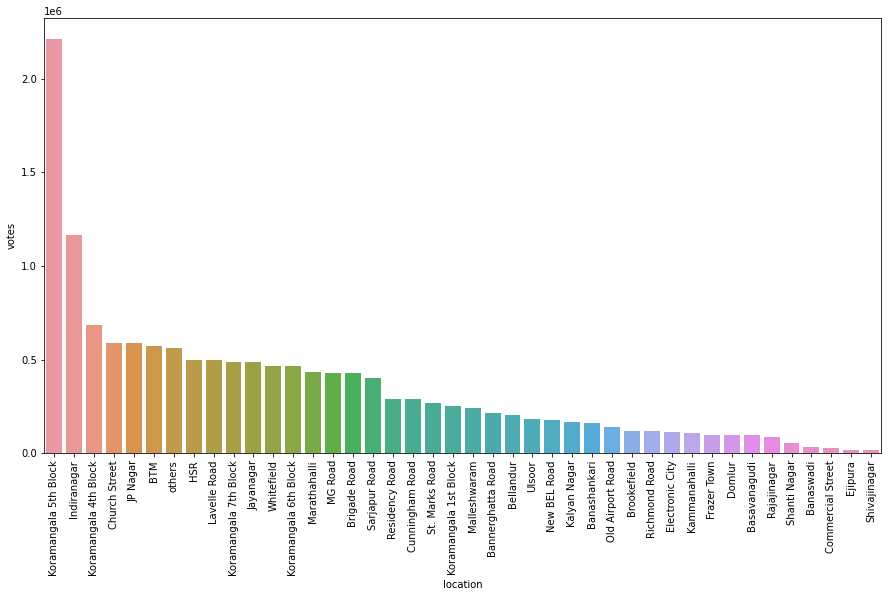

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(df5.index,df5['votes'])
plt.xticks(rotation = 90)

In [ ]:

df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


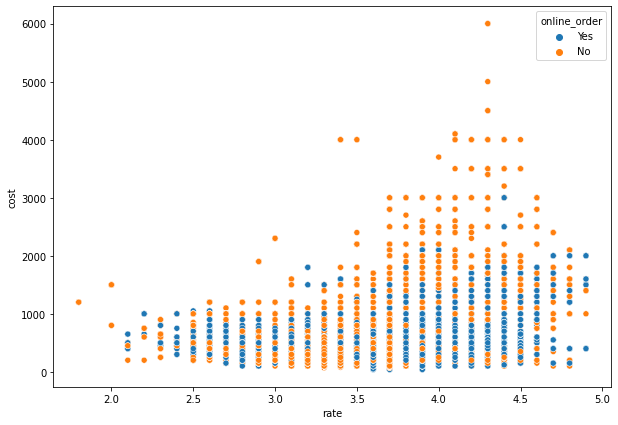

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y="cost",hue='online_order',data=df_zomato)
plt.show()

**Restaurants allowing table online order or not**

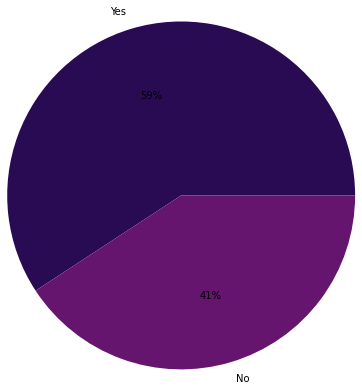

In [ ]:
colors = sns.color_palette('inferno')[0:5]
yn = df_zomato['online_order'].value_counts()
plt.pie(yn.values,labels = yn.index,radius=2,autopct='%.0f%%',colors=colors)
plt.show()

**restaurants allowing table booking or not**

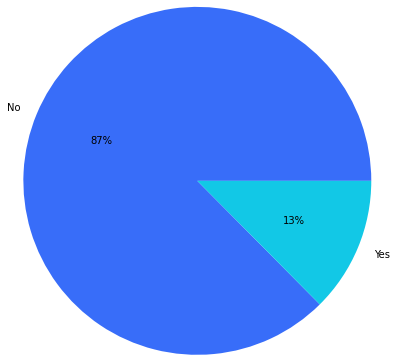

In [ ]:
colors = sns.color_palette('rainbow')[0:5]
yn = df_zomato['book_table'].value_counts()
plt.pie(yn.values,labels = yn.index,radius=2,autopct='%.0f%%',colors=colors)
plt.show()

In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost          51042 non-null  float64
 9   type          51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.3+ MB


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type'],
      dtype='object')

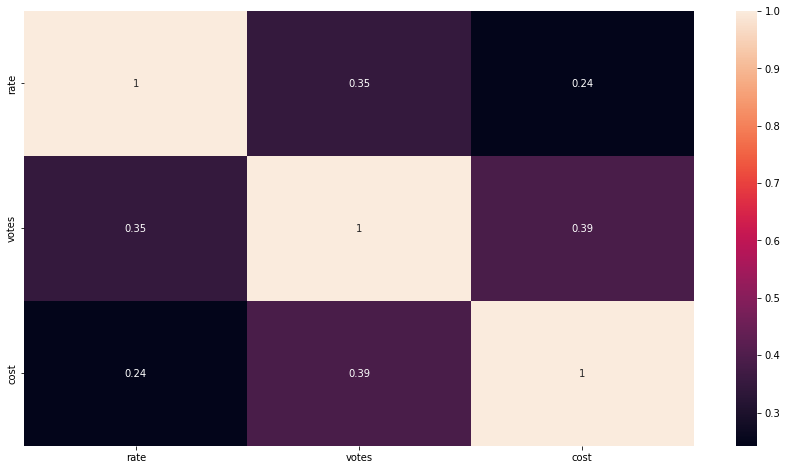

In [ ]:
corr = df_zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_zomato.columns

In [ ]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()

In [ ]:
df_zomato['name']=encoder.fit_transform(df_zomato['name'])
df_zomato['online_order']=encoder.fit_transform(df_zomato['online_order'])
df_zomato['book_table']=encoder.fit_transform(df_zomato['book_table'])
df_zomato['location']=encoder.fit_transform(df_zomato['location'])
df_zomato['rest_type']=encoder.fit_transform(df_zomato['rest_type'])
df_zomato['cuisines']=encoder.fit_transform(df_zomato['cuisines'])
df_zomato['type']=encoder.fit_transform(df_zomato['type'])


In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  int64  
 1   online_order  51042 non-null  int64  
 2   book_table    51042 non-null  int64  
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  int64  
 6   rest_type     51042 non-null  int64  
 7   cuisines      51042 non-null  int64  
 8   cost          51042 non-null  float64
 9   type          51042 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.3 MB


Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'type'],
      dtype='object')

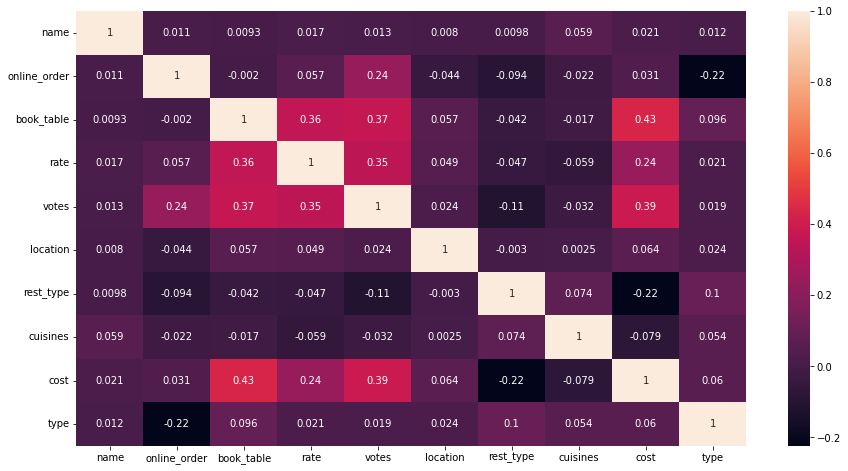

In [ ]:
corr = df_zomato.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_zomato.columns

In [ ]:
df_zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,type
0,3664,1,1,4.1,775,1,2,2145,800.0,0
1,6968,1,0,4.1,787,1,2,947,800.0,0
2,6449,1,0,3.8,918,1,8,761,800.0,0
3,198,0,0,3.7,88,1,6,2539,300.0,0
4,2919,0,0,3.8,166,4,2,2174,600.0,0


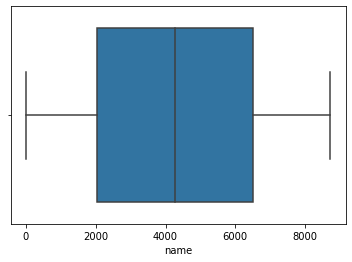

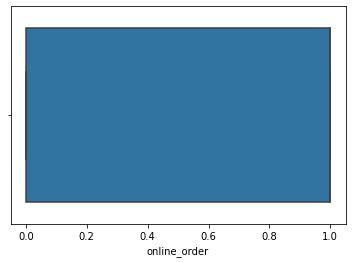

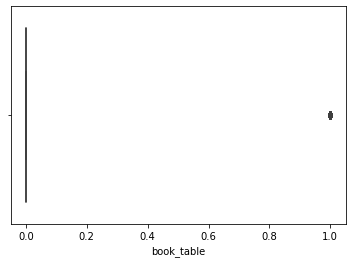

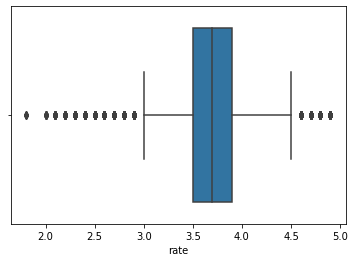

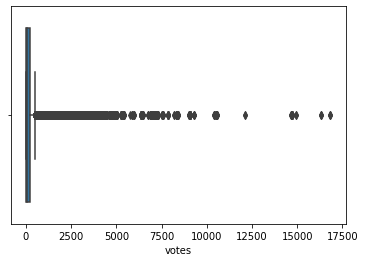

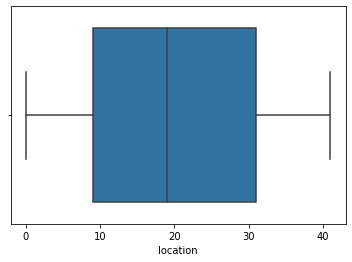

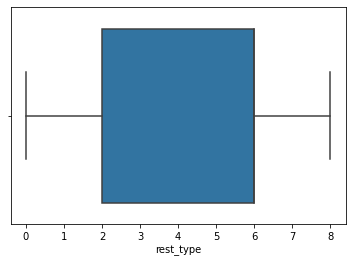

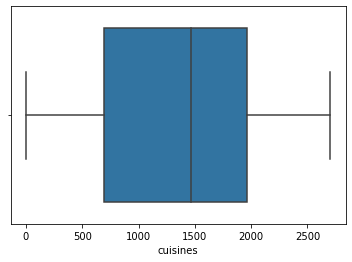

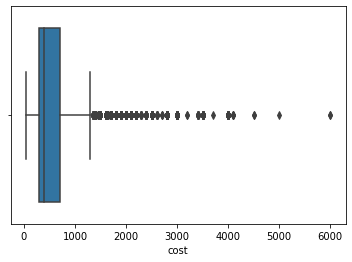

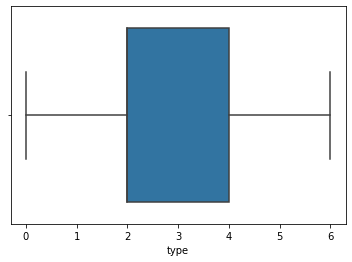

In [ ]:
import seaborn as sns
for i in df_zomato:
  sns.boxplot(x=df_zomato[i])
  plt.show()

In [ ]:
q1 = df_zomato.quantile(0.25)
q2 = df_zomato.quantile(0.75)
IQR = q2 - q1
max_limit = q2 + (1.5 * IQR)
min_limit = q1 - (1.5 * IQR) 


In [ ]:
df_zomato=pd.DataFrame(np.where(df_zomato> max_limit,max_limit,(np.where(df_zomato< min_limit,min_limit,df_zomato))),columns=df_zomato.columns)

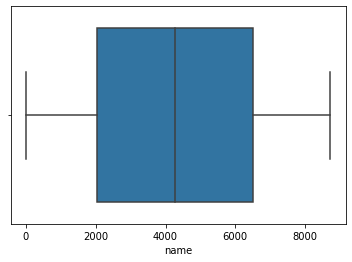

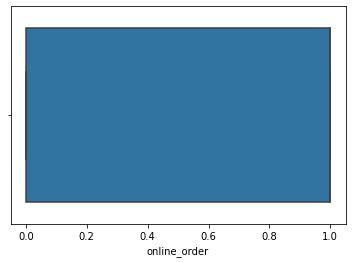

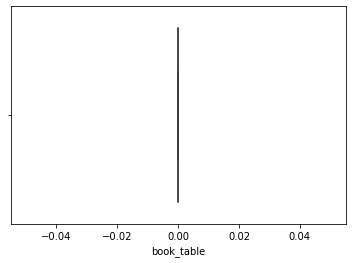

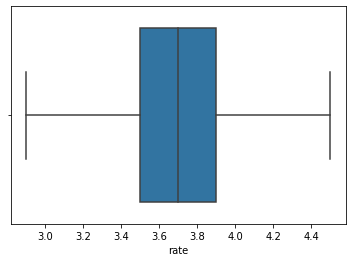

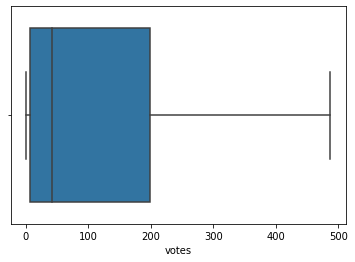

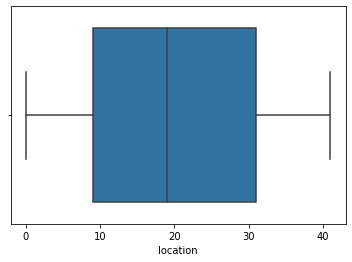

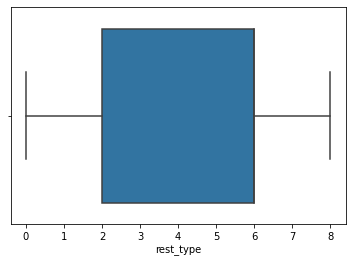

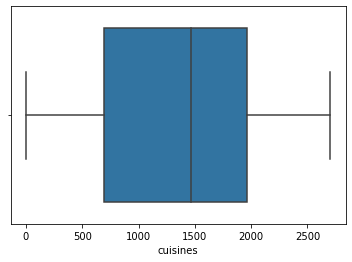

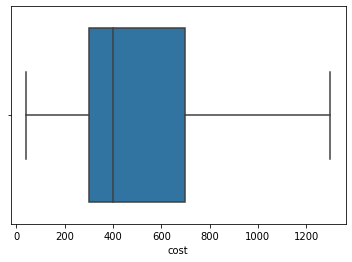

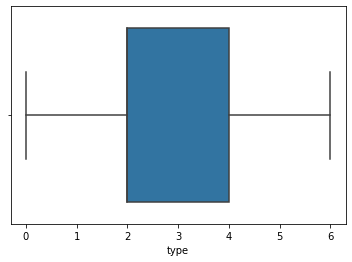

In [ ]:
import seaborn as sns
for i in df_zomato:
  sns.boxplot(x=df_zomato[i])
  plt.show()

In [ ]:
#seperating data and labels
x=df_zomato.drop(columns='online_order',axis=1)
y=df_zomato['online_order']

In [ ]:
print(x)

         name  book_table      rate  votes  location  rest_type  cuisines  \
0      3664.0         0.0  4.100000  487.0       1.0        2.0    2145.0   
1      6968.0         0.0  4.100000  487.0       1.0        2.0     947.0   
2      6449.0         0.0  3.800000  487.0       1.0        8.0     761.0   
3       198.0         0.0  3.700000   88.0       1.0        6.0    2539.0   
4      2919.0         0.0  3.800000  166.0       4.0        2.0    2174.0   
...       ...         ...       ...    ...       ...        ...       ...   
51037   895.0         0.0  3.600000   27.0      40.0        8.0    1004.0   
51038  8437.0         0.0  3.700142    0.0      40.0        8.0    1384.0   
51039  5789.0         0.0  3.700142    0.0      40.0        8.0    1384.0   
51040  1717.0         0.0  4.300000  236.0      41.0        8.0    1384.0   
51041  7935.0         0.0  3.400000   13.0      41.0        8.0    1411.0   

         cost  type  
0       800.0   0.0  
1       800.0   0.0  
2       8

In [ ]:
print(y)

0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
51037    0.0
51038    0.0
51039    0.0
51040    0.0
51041    0.0
Name: online_order, Length: 51042, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=1)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(51042, 9) (45937, 9) (5105, 9)


In [ ]:
print(x_train)

         name  book_table      rate  votes  location  rest_type  cuisines  \
43121  4002.0         0.0  3.700142    0.0       6.0        6.0    1610.0   
1947   1340.0         0.0  4.000000  200.0       3.0        1.0     640.0   
35232  4302.0         0.0  3.300000    4.0       0.0        8.0     343.0   
11395  8119.0         0.0  4.300000  487.0      17.0        8.0    1234.0   
49345    50.0         0.0  3.700142    0.0       5.0        8.0    2448.0   
...       ...         ...       ...    ...       ...        ...       ...   
40787  7361.0         0.0  3.600000   20.0      41.0        6.0    1811.0   
4587    157.0         0.0  3.700000   11.0       5.0        2.0      65.0   
47373  2784.0         0.0  3.900000   51.0      33.0        5.0     260.0   
40763  5156.0         0.0  3.500000   21.0      29.0        2.0    2145.0   
27608  8212.0         0.0  3.500000   16.0       0.0        6.0    1811.0   

         cost  type  
43121   300.0   4.0  
1947    700.0   4.0  
35232   2

In [ ]:
print(y_train)

43121    0.0
1947     0.0
35232    1.0
11395    0.0
49345    0.0
        ... 
40787    0.0
4587     1.0
47373    0.0
40763    1.0
27608    0.0
Name: online_order, Length: 45937, dtype: float64


In [ ]:
print(x_test)

         name  book_table      rate  votes  location  rest_type  cuisines  \
47705  2502.0         0.0  3.800000   74.0       6.0        1.0     587.0   
15399  3383.0         0.0  3.200000    5.0      37.0        6.0    2545.0   
14356   912.0         0.0  3.500000    8.0      13.0        6.0    1885.0   
25099  2737.0         0.0  3.900000   55.0      19.0        8.0     353.0   
96     3874.0         0.0  3.800000   64.0       1.0        6.0    1256.0   
...       ...         ...       ...    ...       ...        ...       ...   
27004  8670.0         0.0  3.700142    0.0       0.0        8.0    1259.0   
6008   4472.0         0.0  4.500000  487.0      38.0        3.0     218.0   
8946   8571.0         0.0  2.900000  208.0      17.0        2.0     969.0   
31874  4260.0         0.0  4.100000  487.0      22.0        6.0    1554.0   
30360  1832.0         0.0  3.300000    8.0       0.0        6.0     121.0   

         cost  type  
47705   650.0   4.0  
15399   150.0   4.0  
14356   3

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale=StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [ ]:
df_zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51042 entries, 0 to 51041
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  float64
 1   online_order  51042 non-null  float64
 2   book_table    51042 non-null  float64
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  float64
 5   location      51042 non-null  float64
 6   rest_type     51042 non-null  float64
 7   cuisines      51042 non-null  float64
 8   cost          51042 non-null  float64
 9   type          51042 non-null  float64
dtypes: float64(10)
memory usage: 3.9 MB


In [ ]:
#importing the needed libraries for training the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rand=RandomForestClassifier()
model_rand.fit(x_train,y_train)
print('accuracy of random forest classifier on trining set:{:.2f}'.format(model_rand.score(x_train,y_train)))
print('accuracy of random forest classifier on test set:{:.2f}'.format(model_rand.score(x_test,y_test)))

accuracy of random forest classifier on trining set:0.99
accuracy of random forest classifier on test set:0.93


In [ ]:
pred_rand = model_rand.predict(x_test)
pred_rand

array([1., 0., 1., ..., 1., 1., 0.])

In [ ]:
from sklearn.metrics import precision_score
print('Precision Score:',precision_score(y_test,pred_rand))

Precision Score: 0.930164888457808


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.970000 using {'max_features': 'log2', 'n_estimators': 1000}
0.875333 (0.031700) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.957000 (0.019858) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.966333 (0.017221) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.867667 (0.029403) with: {'max_features': 'log2', 'n_estimators': 10}
0.962333 (0.022013) with: {'max_features': 'log2', 'n_estimators': 100}
0.970000 (0.016533) with: {'max_features': 'log2', 'n_estimators': 1000}


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.92      0.90      0.91      1908
         1.0       0.94      0.95      0.94      2923

    accuracy                           0.93      4831
   macro avg       0.93      0.92      0.92      4831
weighted avg       0.93      0.93      0.93      4831



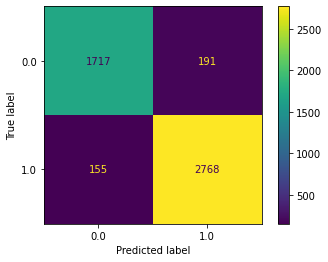

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(model_rand,x_test,y_test)
print(classification_report(y_test,pred_rand))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('accuracy of KNN classifier on trining set:{:.2f}'.format(knn.score(x_train,y_train)))
print('accuracy of KNN classifier on test set:{:.2f}'.format(knn.score(x_test,y_test)))

accuracy of KNN classifier on trining set:0.89
accuracy of KNN classifier on test set:0.82


In [ ]:
pred_knn=knn.predict(x_test)
pred_knn

array([1, 0, 0, ..., 1, 1, 0])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.79      0.77      0.78      2082
           1       0.84      0.86      0.85      3023

    accuracy                           0.82      5105
   macro avg       0.82      0.82      0.82      5105
weighted avg       0.82      0.82      0.82      5105



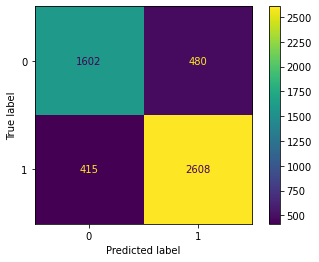

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(knn,x_test,y_test)
print(classification_report(y_test,pred_knn))

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
print('accuracy of BNB classifier on training set:{:2f}'.format(bnb.score(x_train,y_train)))
print('accuracy of BNB classifier on test set:{:2f}'.format(bnb.score(x_test,y_test)))

accuracy of BNB classifier on training set:0.673260
accuracy of BNB classifier on test set:0.666736


In [ ]:
prediction_bnb = bnb.predict(x_test)
prediction_bnb

array([1., 1., 1., ..., 1., 1., 1.])

              precision    recall  f1-score   support

         0.0       0.61      0.43      0.51      1908
         1.0       0.69      0.82      0.75      2923

    accuracy                           0.67      4831
   macro avg       0.65      0.63      0.63      4831
weighted avg       0.66      0.67      0.65      4831



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


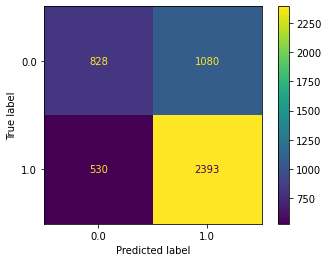

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(bnb,x_test,y_test)
print(classification_report(y_test,prediction_bnb))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
logreg.fit(x_test,y_test)
print('accuracy of logistic resgression classifier on training set:{:.2f}'
.format(logreg.score(x_train,y_train)))
print('accuracy of logistic resgression classifier on test set:{:.2f}'
.format(logreg.score(x_test,y_test)))

accuracy of logistic resgression classifier on training set:0.67
accuracy of logistic resgression classifier on test set:0.67


In [ ]:
predict=logreg.predict(x_test)
predict

array([1., 1., 1., ..., 1., 1., 1.])

              precision    recall  f1-score   support

         0.0       0.63      0.43      0.51      1908
         1.0       0.69      0.83      0.76      2923

    accuracy                           0.67      4831
   macro avg       0.66      0.63      0.63      4831
weighted avg       0.67      0.67      0.66      4831



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


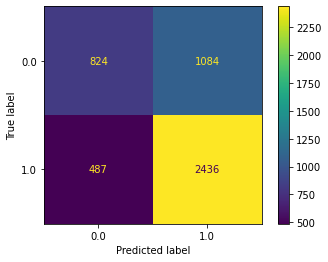

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(logreg,x_test,y_test)
print(classification_report(y_test,predict))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=30)
clf.fit(x_train,y_train)
print('accuracy on decision tree classifier on training set:{:.2f}'.format(clf.score(x_train,y_train)))
print('accuracy of decision tree classifier on test set :{:.2f}'.format(clf.score(x_test,y_test)))

accuracy on decision tree classifier on training set:0.99
accuracy of decision tree classifier on test set :0.91


In [ ]:
prediction_dec = clf.predict(x_test)
prediction_dec

array([0., 0., 1., ..., 1., 0., 1.])

              precision    recall  f1-score   support

         0.0       0.87      0.90      0.88      1908
         1.0       0.93      0.91      0.92      2923

    accuracy                           0.91      4831
   macro avg       0.90      0.90      0.90      4831
weighted avg       0.91      0.91      0.91      4831



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


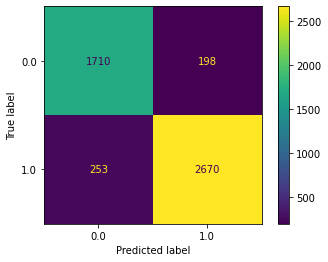

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(clf,x_test,y_test)
print(classification_report(y_test,prediction_dec))

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
print('accuracy of SVM classifier on training set:{:2f}'.format(svm.score(x_train,y_train)))
print('accuracy of SVM classifier on test set:{:2f}'.format(svm.score(x_test,y_test)))

accuracy of SVM classifier on training set:0.735681
accuracy of SVM classifier on test set:0.728306


In [ ]:
#Adaboostingclassifier
from sklearn.ensemble import AdaBoostClassifier
modela=AdaBoostClassifier()
modela.fit(x_train,y_train)
print('Accuracy of Adaboost classifier on train set:{:.2f}'.format(modela.score(x_train,y_train)))
print('Accuracy of Adaboost classifier on test set:{:.2f}'.format(modela.score(x_test,y_test)))


Accuracy of Adaboost classifier on train set:0.73
Accuracy of Adaboost classifier on test set:0.73


In [ ]:
preda=modela.predict(x_test)
preda

array([1, 0, 0, ..., 1, 1, 1])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

           0       0.70      0.60      0.64      2082
           1       0.75      0.82      0.78      3023

    accuracy                           0.73      5105
   macro avg       0.72      0.71      0.71      5105
weighted avg       0.73      0.73      0.73      5105



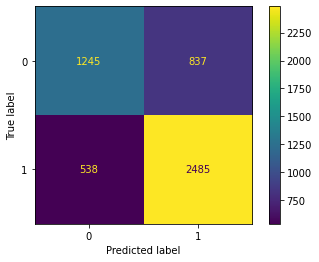

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(modela,x_test,y_test)
print(classification_report(y_test,preda))

In [ ]:
#Baggingclassifier
from sklearn.ensemble import BaggingClassifier
modelb=BaggingClassifier()
modelb.fit(x_train,y_train)
print('Accuracy of bagging classifier on train set:{:.2f}'.format(modelb.score(x_train,y_train)))
print('Accuracy of bagging classifier on test set:{:.2f}'.format(modelb.score(x_test,y_test)))

Accuracy of bagging classifier on train set:0.99
Accuracy of bagging classifier on test set:0.92


In [ ]:
predb=modelb.predict(x_test)
predb

array([0., 0., 1., ..., 1., 0., 1.])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1908
         1.0       0.94      0.93      0.93      2923

    accuracy                           0.92      4831
   macro avg       0.91      0.92      0.91      4831
weighted avg       0.92      0.92      0.92      4831



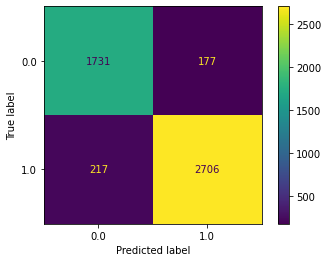

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(modelb,x_test,y_test)
print(classification_report(y_test,predb))

In [ ]:
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
print('Accuracy of bagging classifier on train set:{:.2f}'.format(modelb.score(x_train,y_train)))
print('Accuracy of bagging classifier on test set:{:.2f}'.format(modelb.score(x_test,y_test)))

Accuracy of bagging classifier on train set:0.99
Accuracy of bagging classifier on test set:0.92


In [ ]:
predg=gbc.predict(x_test)
predg

array([1., 1., 1., ..., 0., 0., 1.])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


              precision    recall  f1-score   support

         0.0       0.70      0.64      0.67      1908
         1.0       0.78      0.82      0.80      2923

    accuracy                           0.75      4831
   macro avg       0.74      0.73      0.73      4831
weighted avg       0.74      0.75      0.75      4831



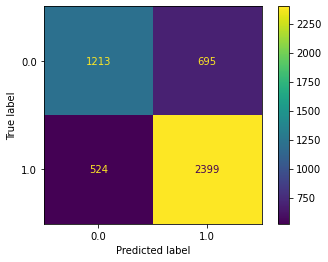

In [ ]:
from sklearn.metrics import plot_confusion_matrix,classification_report
plot_confusion_matrix(gbc,x_test,y_test)
print(classification_report(y_test,predg))